### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息
> 在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题
>作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。


**(1) 我们的自变量是什么？因变量是什么？**

答案：自变量是 `文字与颜色是否一致（2分类）`。因变量是 `辨识的响应时间`。

**(2) 此任务的适当假设集是什么？**

你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

答案：
`ver1`
- `假设集`是对在该网站上所有参与斯特鲁普测试并提交测试结果的人，进行随机抽样而得到的一个随机样本（从无限总体中的抽样）。
$$H_0: \mu_{con} - \mu_{incon} \geq 0 $$
$$H_1: \mu_{con} - \mu_{incon} < 0 $$
- $H_0$ 定义为`原假设`,$H_1$  定义为`备择假设`
- $\mu_{con}$为`Congruent`的样本平均时间 
- $\mu_{incon}$为`Incongruent`样本平均时间
- $H_0$零假设为$\mu_{con}$为`Congruent`的样本平均时间大于等于$\mu_{incon}$为`Incongruent`样本平均时间
- $H_1$备择假设为$\mu_{con}$为`Congruent`的样本平均时间小于$\mu_{incon}$为`Incongruent`样本平均时间

`ver2`
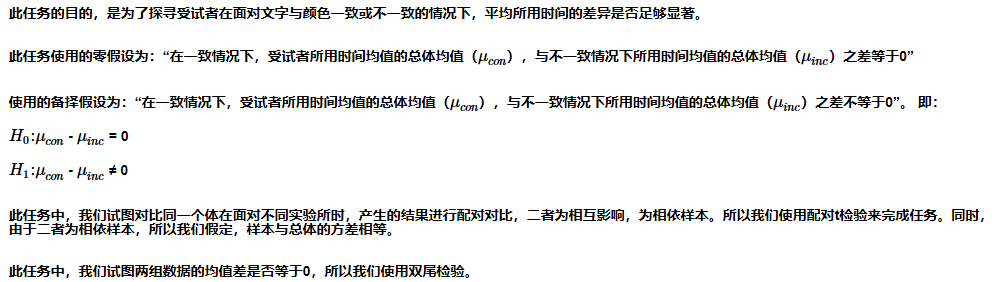

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

**(3) 报告关于此数据集的一些描述性统计**

包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(42)

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
#查看数据集信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 512.0 bytes


In [4]:
#查看行列数
df.shape

(24, 2)

In [5]:
#Congruent的均值
con_mean = df.Congruent.mean()
con_mean

14.051124999999999

In [6]:
#Incongruent的均值
incon_mean = df.Incongruent.mean()
incon_mean

22.015916666666666

In [7]:
#Congruent的标准差
con_std = df.Congruent.std()
con_std

3.5593579576451955

In [8]:
#Incongruent的标准差
incon_std =  df.Incongruent.std()
incon_std

4.797057122469138

In [11]:
#与Describe做对比
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


答案:

`ver1`
- `Congruent`列的均值和标准差都小于`Incongruent`列

`ver2`
- 集中趋势测量
    - 一致组的平均反应时间约为14.05；不一致组的平均反应时间约为22.02。
    - 一致组的最小反应时间约为8.63，最大约为22.33；不一致组的最小反应时间约为15.69，最大约为35.26。
- 变异测量
    - 一致组的标准差约为3.56；不一致组的标准差约为4.80。¶
    - 一致组的IQR约为4.31；不一致组的IQR约为5.33。
    - 文字与颜色一致时,数据集的离散程度更小。

**(4) 提供显示样本数据分布的一个或两个可视化**

用一两句话说明你从图中观察到的结果。

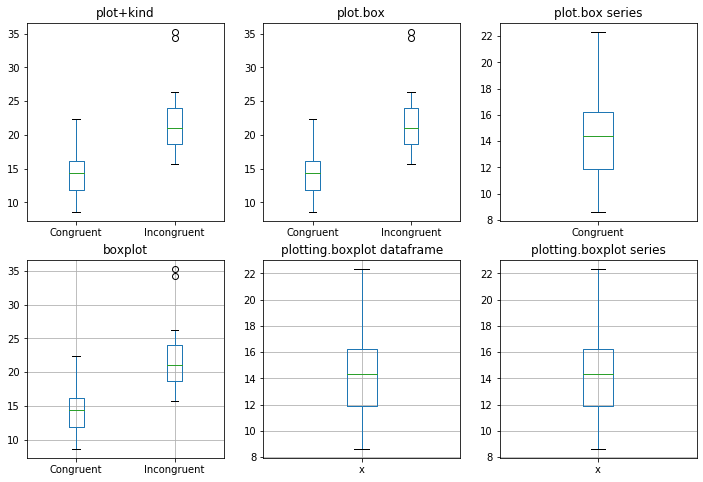

In [48]:
# 创建可视化图表
# plot vs plotting
## set frame
fig,ax = plt.subplots(2,3,figsize=(12,8))
ax[0,0].set_title('plot+kind');
ax[0,1].set_title('plot.box');
ax[0,2].set_title('plot.box series');
ax[1,0].set_title('boxplot');
ax[1,1].set_title('plotting.boxplot dataframe');
ax[1,2].set_title('plotting.boxplot series');

## set chart
df.plot(kind='box',ax=axes[0,0]);
df.plot.box(ax=axes[0,1])
df['Congruent'].plot.box(ax=axes[0,2]);

df.boxplot(ax=axes[1,0]);
pd.plotting.boxplot(df['Congruent'],ax=axes[1,1]);
pd.plotting.boxplot(df['Congruent'],ax=axes[1,2]);

## notes
#方式1，plot+kind 与 plot. 的方式相同，看个人爱好
#方式2，boxplot 与 plotting.boxplot 的方式相同。前者是输入必须是 dataframe，后者可以筛选为 series

#plotting是早期 pandas 调用 matpotlib 的方式，plot 是后出的封装方式，对分类数据有优化（见后面 dig deeper）建议后者
#参数很多 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

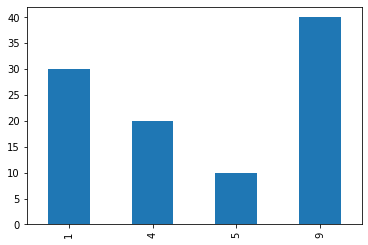

In [90]:
# dig deeper
#Pandas plot function is using Matplotlib's pyplot to do the plotting, but it's like a shortcut.
# https://stackoverflow.com/questions/57677559/differences-between-bar-plots-in-matplotlib-and-pandas

## data
s = pd.Series([30,20,10,40], index=[1,4,5,9])

## try1
s.plot.bar();
#plot后面不用加 plt.show() 的 

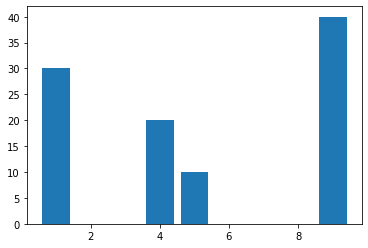

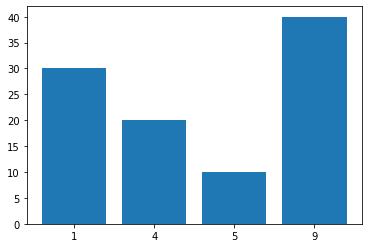

In [93]:
## try2
plt.bar(s.index, s.values)
plt.show()
#plot做的事相当于这样
plt.bar(s.index.astype(str), s.values);

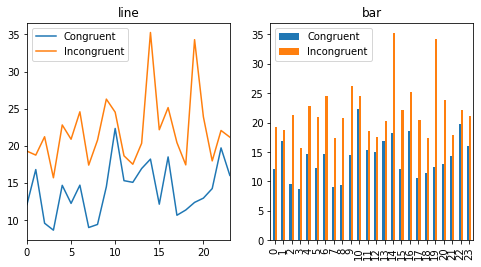

In [105]:
# more
## set frame
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].set_title('line');
ax[1].set_title('bar');

## set ax
df.plot.line(ax=ax[0]);
df.plot.bar(ax=ax[1]);

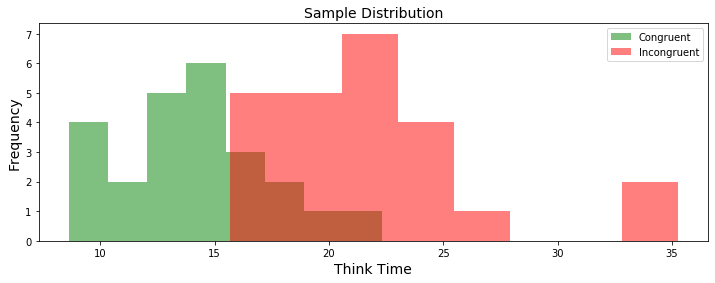

In [104]:
# hist (pure matplt)
plt.figure(figsize = (12,4))
plt.title('Sample Distribution',size = 14)
plt.hist(df['Congruent'], bins=8, alpha =0.5, color = 'green',label = 'Congruent')
plt.hist(df['Incongruent'],bins=8, alpha =0.5, color = 'red',label = 'Incongruent')
plt.ylabel('Frequency',size = 14)
plt.xlabel('Think Time',size = 14)
plt.legend();

答案:

`ver1`
- 由上面箱图可以直观的发现，`Congruent`列的最小值，Q1，Q2，Q3和最大值都分别小于`Incongruent`列的五数。
- 由箱图发现`Incongruent`列中，有2个异常值，为了保持数据的完整性，对异常值未做处理。
- `Incongruent`列的最短反应时间相对来说长一点。
- `Congruent`列和`Incongruent`列的最大值相差时间不是很大（异常值除外）。

`ver2`
- 通过观察直方图，我们可以发现在一致组的反应时间多分布于不一致组的左侧。
- 通过观察两个箱型图，我们发现一致组不存在异常值。而不一致组存在两个异常值。这可能会影响到数据的离散分布情况。但由于样本规模较小（只有24个），所以我们暂不删除这两个值。

**(5) 现在，执行统计测试并报告你的结果**

你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [114]:
# methord1 sample stats (from ver2)

import scipy.stats as stats

df['Mean Deviation'] = df['Congruent'] - df['Incongruent']
print(df['Mean Deviation'].mean(), df['Mean Deviation'].std())

xx = np.random.normal(df['Mean Deviation'].mean(), df['Mean Deviation'].std(), 10000)
## 对于直接使用norm分布再加一个验证就更好了（虽然确实是），见后面plus
print(np.percentile(xx, 0.25), np.percentile(xx, 97.5))

stats.ttest_rel(df['Congruent'],df['Incongruent'])

-7.964791666666666 4.864826910359056
-22.012696893833297 1.5968001203414626


Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

In [115]:
# plus norm test
stats.normaltest(df['Mean Deviation'],axis=0)
#statistic 是z值
#也可以使用下面的命令，输出意义见文档
#stats.shapiro(df['Mean Deviation'])
#stats.anderson (df['Mean Deviation'], dist ='norm' )

NormaltestResult(statistic=7.531697890987548, pvalue=0.02314795254148134)

In [116]:
# methord2 bootstrap

# 先设定要模拟的两列数据
con_mean, incon_mean = [], []

# 通过自助法模拟1w遍，记录并存储每一遍的mean值
for _ in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    # 上面用了 df.shape[0] 定义 sample 的值（和实际值相同）
    con_mean.append(sample.Congruent.mean())
    incon_mean.append(sample.Incongruent.mean())

# 将两个值求差看diff
## 注意因为 list 无法做矢量减法，需要转换为 dataframe格式，也方便做图
diffs = pd.Series(con_mean) - pd.Series(incon_mean)
## 当然也可以用 array 格式，看个人习惯
# diffs = np.array(con_mean) - np.array(incon_mean)

# diffs 也可以放在循环里面完成
# 我个人习惯是放在之后计算，自助法只模拟原数据相关的featrue
# 用自助法的好处是不用管样本的分布，因为取平均值后就是正态分布

In [117]:
# 在这里执行统计检验
con_means, incon_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = df.sample(24, replace=True)
    con_mean = bootsamp.Congruent.mean()
    incon_mean = bootsamp.Incongruent.mean()
    con_means.append(con_mean)
    incon_means.append(incon_mean)
    diffs.append(con_mean - incon_mean)

In [118]:
# output
np.std(con_means),np.std(incon_means),np.std(diffs)

(0.7110092491715122, 0.9623222200102206, 0.9736736827846226)

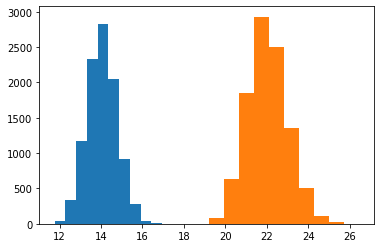

In [125]:
# visual
plt.hist(con_means);
plt.hist(incon_means);

-9.972251041666665 -6.1652885416666665


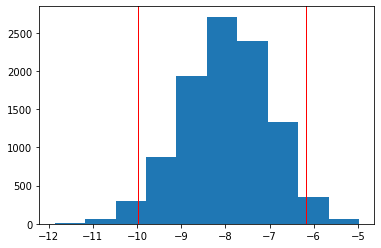

In [126]:
# diff visual
low, high = np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)
print(low, high)

plt.hist(diffs);
plt.axvline(x=low, color='r', linewidth=1);
plt.axvline(x=high, color='r', linewidth=1);

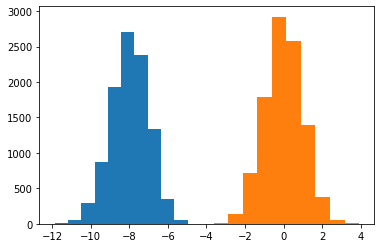

In [130]:
# null diffs
null_diffs = np.random.normal(0, np.std(diffs), 10000)

plt.hist(diffs)
plt.hist(null_diffs);

In [133]:
# judge
(diffs > null_diffs).mean()

0.0

答案:

`methrod1`

- 本次实验中，我们假定的显著性水平（α）为0.05，即置信水平为95%。
- 样本均值差的均值约为-7.96， 标准差约为4.86，自由度（df）为23（df = n-k）。
- 查询t值表，可知t在自由度为23，显著性水平（α）为0.05的情况下，t临界值为~~1.714~~ 应为 2.069。
- 本次测试中，统计法结果约为-8.02，p值约为0，小于显著性水平（α）0.05。
- 结论：在5% 的显著性水平下，可以拒绝零假设。既受试者在面对文字与颜色一致或不一致的情况下，平均判断时间的差异足够显著

`解释`
- t边界值应为 2.069
    - 因为假设是等于和不等，所以最后结论 t 的边界值应为 2.069 不是 1.714
- 测试是相关的，使用 rel 而不是 ind
    - 因为这24个测试每行的数据是一个人的反应时间。con 和 incon 是一个人前后的两个值，所以前后是对应的。
    - 属于 `配对测量`  因该使用 rel
    - 参考 https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/tests-of-means/how-are-dependent-and-independent-samples-different/
